In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Import data
df = pd.read_csv('epa-sea-level.csv')


In [2]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


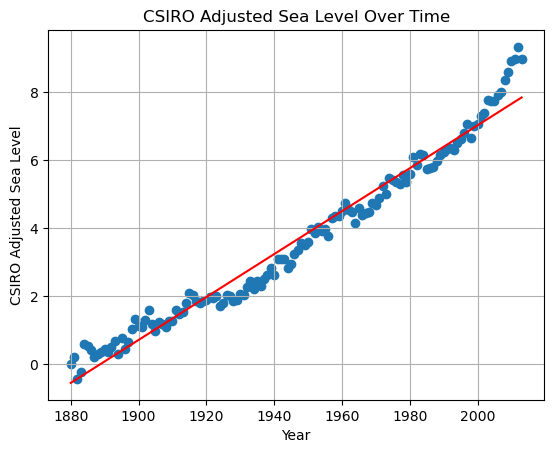

In [4]:


# Assuming df is your DataFrame containing the provided data
# Plot scatter plot
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('CSIRO Adjusted Sea Level Over Time')
plt.grid(True)
result = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
slope = result.slope
intercept = result.intercept
y_hat = slope * df['Year'] + intercept
plt.plot(df['Year'], y_hat, color="red")
plt.show()


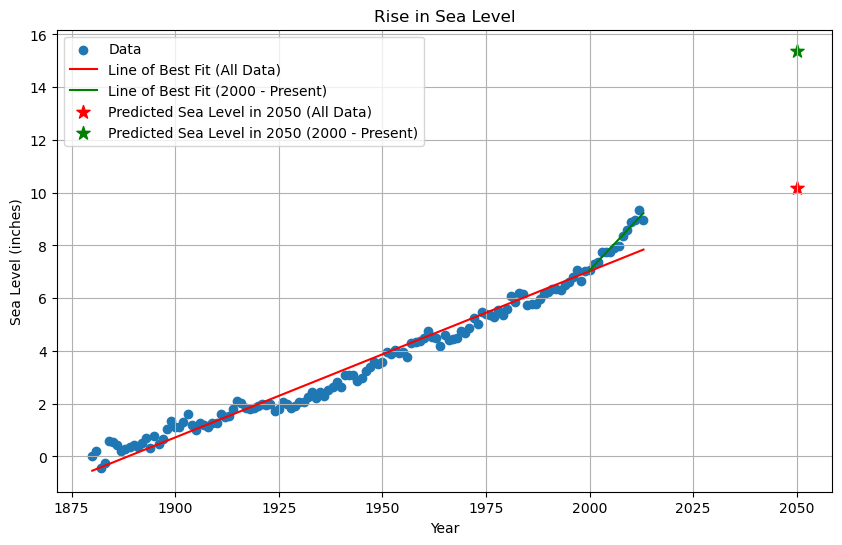

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Step 1: Read the data
df = pd.read_csv('epa-sea-level.csv')

# Step 2: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data')

# Step 3 & 4: Fit a line of best fit using all data
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Predict sea level rise in 2050 using the line of best fit
future_year = 2050
future_sea_level = slope * future_year + intercept

# Plot the line of best fit
plt.plot(df['Year'], slope * df['Year'] + intercept, color='red', label='Line of Best Fit (All Data)')

# Step 6: Fit a line of best fit using data from year 2000 through the most recent year
recent_data = df[df['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])

# Predict sea level rise in 2050 using the line of best fit for recent data
future_sea_level_recent = slope_recent * future_year + intercept_recent

# Plot the line of best fit for recent data
plt.plot(recent_data['Year'], slope_recent * recent_data['Year'] + intercept_recent, color='green', label='Line of Best Fit (2000 - Present)')

# Plot the predicted sea level rise in 2050 for both cases
plt.scatter(future_year, future_sea_level, color='red', marker='*', s=100, label=f'Predicted Sea Level in {future_year} (All Data)')
plt.scatter(future_year, future_sea_level_recent, color='green', marker='*', s=100, label=f'Predicted Sea Level in {future_year} (2000 - Present)')

# Step 7: Customize the plot
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
